In [1]:
import os, glob, shutil
import mne
import numpy as np
import scipy.io as io
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from PIL import Image

In [2]:
matfile = h5py.File('/Users/knapen/Downloads/pRF/pRF/workspace_retinotopyCaltsmash.mat', 'r')
maskimages = matfile.get('maskimages') # creating those myself in this experiment
imageref = matfile['images']
images = matfile[imageref[0][0]].value

/Users/knapen/software/anaconda3/envs/neuro/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.


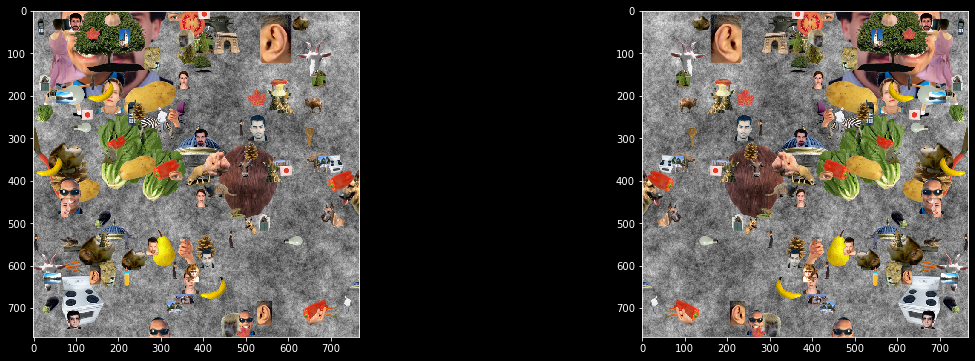

In [3]:
# test which axis is the horizontal axis
f, axs = plt.subplots(1,2,figsize=(20,6))
axs[0].imshow(images[0].T)
axs[1].imshow(images[0].T[:,::-1])

In [ ]:
stimf = h5py.File('../stimuli/stims_original.h5', 'w')
stimf.create_dataset('stimuli', data=images, compression=6)
stimf.close()

In [ ]:
new_images = np.array([np.array(Image.fromarray(im.T).resize((1024,1024)))[::-1] for im in images])
stimf = h5py.File('/Users/knapen/projects/prf-seeg/experiment/stimuli/stims_1024.h5', 'w')
stimf.create_dataset('stimuli', data=new_images, compression=6)
stimf.close()

new_images = np.array([np.array(Image.fromarray(im.T).resize((512,512)))[::-1] for im in images])
stimf = h5py.File('/Users/knapen/projects/prf-seeg/experiment/stimuli/stims_512.h5', 'w')
stimf.create_dataset('stimuli', data=new_images, compression=6)
stimf.close()

new_images = np.array([np.array(Image.fromarray(im.T).resize((256,256)))[::-1] for im in images])
stimf = h5py.File('/Users/knapen/projects/prf-seeg/experiment/stimuli/stims_256.h5', 'w')
stimf.create_dataset('stimuli', data=new_images, compression=6)
stimf.close()